In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

скачаем датасет

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


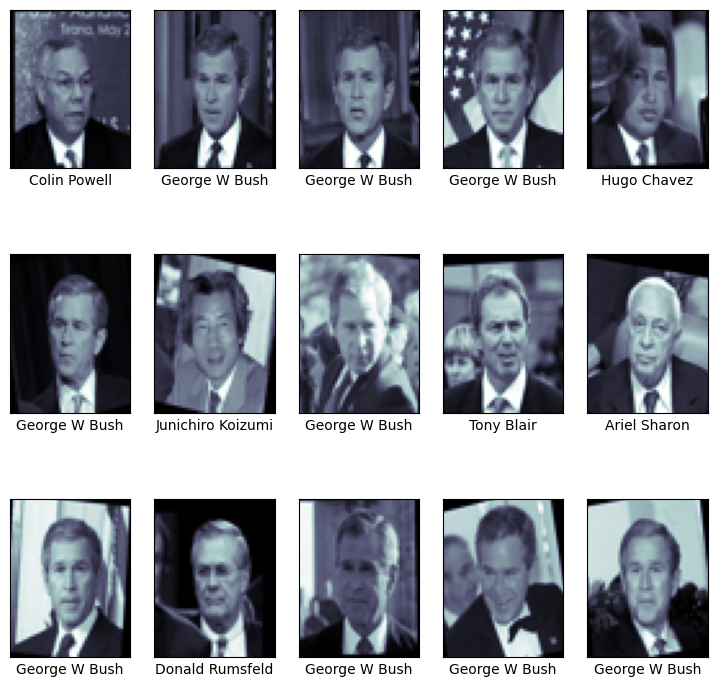

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

выбираем 150 самых информативных

In [41]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

poly

In [71]:
svc = SVC(kernel='poly')
model = make_pipeline(pca, svc)


#разбиваем на трейн и тест
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

#подбираем гиперпараметр (возможно, это действительно достаточно затратно по времени(брать такой разброс), но зато нашелся)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': list(range(1, 20))}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)



model = grid.best_estimator_
yfit = model.predict(Xtest)


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

CPU times: total: 29.2 s
Wall time: 40.6 s
{'svc__C': 18}
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.86      0.09      0.16        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.38      1.00      0.55       126
Gerhard Schroeder       0.00      0.00      0.00        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       0.00      0.00      0.00        12
       Tony Blair       0.00      0.00      0.00        42

         accuracy                           0.39       337
        macro avg       0.15      0.14      0.09       337
     weighted avg       0.32      0.39      0.24       337



c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

как-то все плохо, пока не понимаю почему

матрица ошибок классификатора

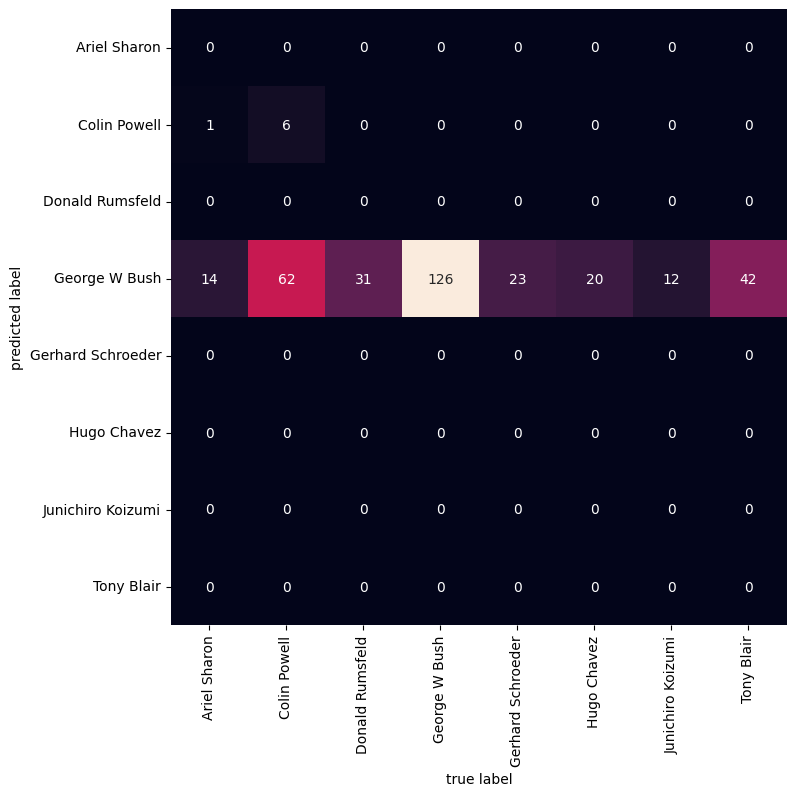

In [72]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

все люди у него похожи на Буша больше, чем на самих себя)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.3916913946587537

rbf

In [69]:
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)



from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)


from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': list(range(1, 20))}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)



model = grid.best_estimator_
yfit = model.predict(Xtest)


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

CPU times: total: 29.9 s
Wall time: 42.7 s
{'svc__C': 3}
                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.60      0.72        15
     Colin Powell       0.89      0.84      0.86        68
  Donald Rumsfeld       0.83      0.61      0.70        31
    George W Bush       0.70      0.96      0.81       126
Gerhard Schroeder       0.76      0.57      0.65        23
      Hugo Chavez       1.00      0.30      0.46        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.79      0.62      0.69        42

         accuracy                           0.77       337
        macro avg       0.85      0.67      0.72       337
     weighted avg       0.80      0.77      0.76       337



матрица ошибок классификатора

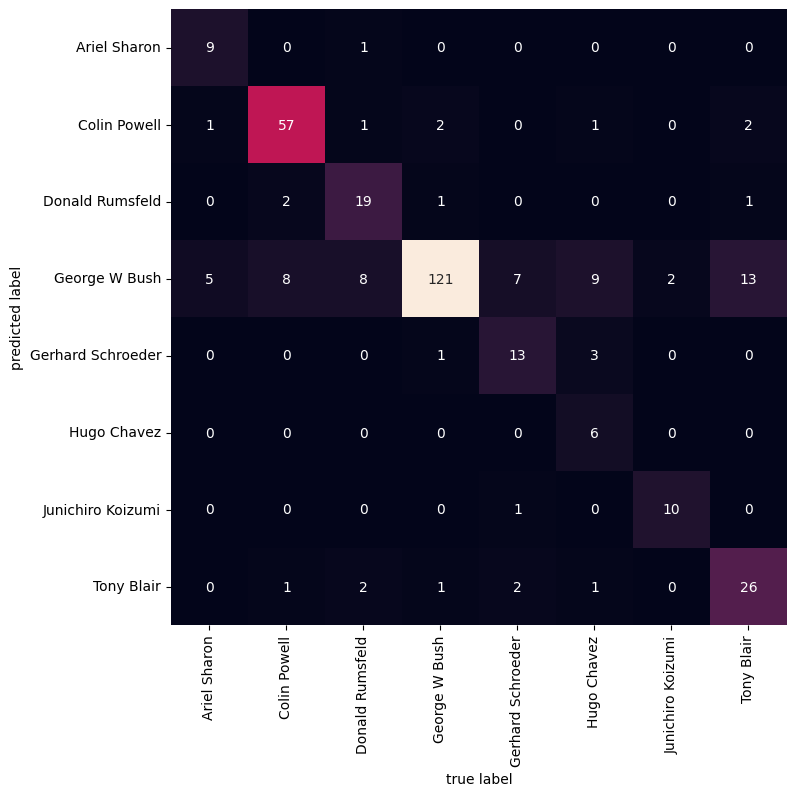

In [70]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

точность

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.7744807121661721

и снова он определил многих в Буши, но уже и самих этих людей находит!!!

уже намного лучше, чем poly

sigmoid

In [66]:
svc = SVC(kernel='sigmoid')
model = make_pipeline(pca, svc)



from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)


from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': list(range(1, 20))}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)



model = grid.best_estimator_
yfit = model.predict(Xtest)


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

CPU times: total: 26.4 s
Wall time: 32.5 s
{'svc__C': 2}
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.67      0.62        15
     Colin Powell       0.79      0.81      0.80        68
  Donald Rumsfeld       0.70      0.61      0.66        31
    George W Bush       0.76      0.84      0.80       126
Gerhard Schroeder       0.75      0.65      0.70        23
      Hugo Chavez       0.86      0.60      0.71        20
Junichiro Koizumi       0.90      0.75      0.82        12
       Tony Blair       0.72      0.67      0.69        42

         accuracy                           0.75       337
        macro avg       0.76      0.70      0.72       337
     weighted avg       0.76      0.75      0.75       337



точность

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.7537091988130564

матрица ошибок классификатора

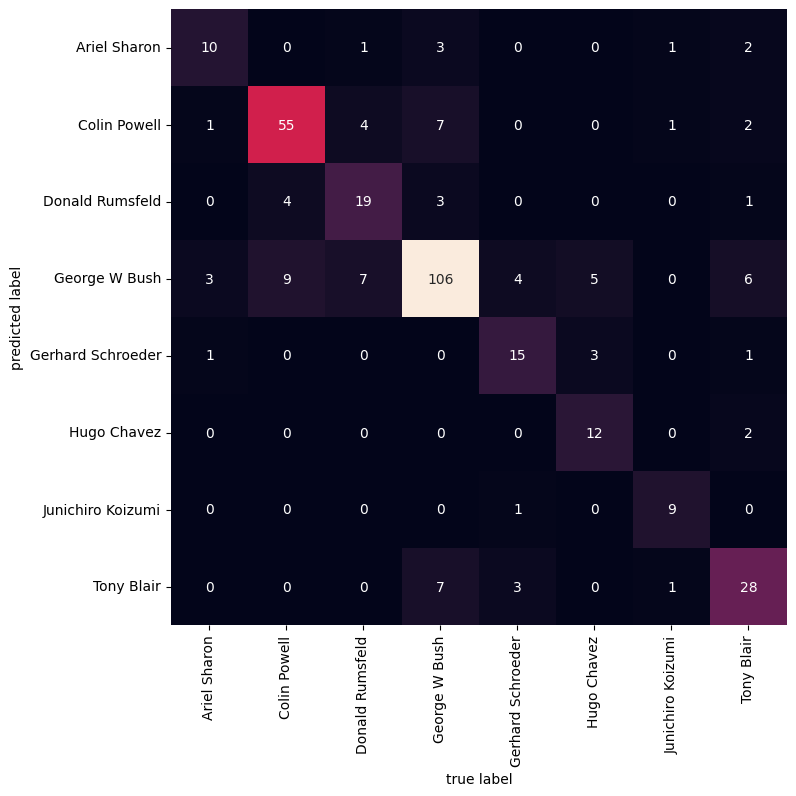

In [68]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

лучшим ядром оказался rbf

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
model = make_pipeline(pca, lr)#1. модель объявила

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

param_grid = {'logisticregression__C': list(range(1, 20))}#2. по сетке С подобрала параметр
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)



CPU times: total: 19.2 s
Wall time: 25.5 s
{'logisticregression__C': 6}


In [82]:
model = grid.best_estimator_
yfit = model.predict(Xtest)#3. модель обучила на тестовых данных


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.45      0.67      0.54        15
     Colin Powell       0.80      0.76      0.78        68
  Donald Rumsfeld       0.51      0.58      0.55        31
    George W Bush       0.85      0.71      0.78       126
Gerhard Schroeder       0.52      0.70      0.59        23
      Hugo Chavez       0.75      0.45      0.56        20
Junichiro Koizumi       0.73      0.92      0.81        12
       Tony Blair       0.61      0.74      0.67        42

         accuracy                           0.70       337
        macro avg       0.65      0.69      0.66       337
     weighted avg       0.73      0.70      0.71       337



In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.7032640949554896

логистическая регрессия качество показала лучше, чем метод опорных векторов с ядром poly, но хуже, чем SVM с ядрами rbf и sigmoid

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [176]:
import pandas as pd

data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [177]:
data.value_counts('type')

type
white    4898
red      1599
dtype: int64

In [178]:
data['type'] = data.apply(lambda x : 0 if x['type'] == 'white' else 1, axis = 1)

In [179]:
data.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

все в циферках = уже отлично, можно посмотреть наны

In [180]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [181]:
data.shape

(6497, 13)

размер позволяет нам дропнуть наны

In [182]:
data = data.dropna()

<Axes: >

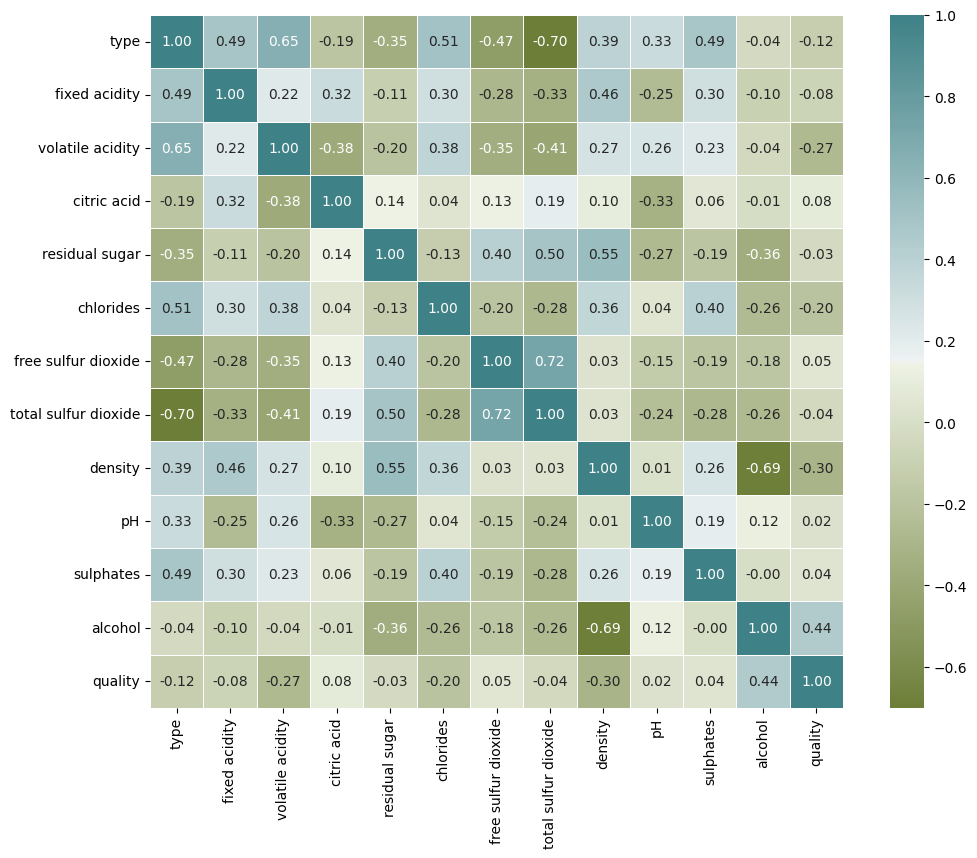

In [183]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

дропну еще total sulfur dioxide - сильно коррелирует с другими признаками, а с нашим главным - нет

In [184]:
data.drop('total sulfur dioxide', axis=1, inplace=True)

теперь можно с этим работать

In [185]:
y = data['quality']
X = data.drop('quality', axis=1)

X.head()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [186]:
import matplotlib.pyplot as plt

In [187]:
def plotting(grid, params):
    """Функция для построения графиков"""
    scores_mean = grid.cv_results_['mean_test_score']
    scores_sd = grid.cv_results_['std_test_score']

    fig, ax = plt.subplots()
    ax.plot(params,scores_mean)
    ax.fill_between(params, (scores_mean-scores_sd), (scores_mean+scores_sd), color='g', alpha=.1)

гридсерчим

In [188]:
def model_train(model, param_grid, hyperparams):
    """Функция подбора гиперпараметров, вызывает функцию с графиками"""
    grid = GridSearchCV(model, param_grid)  
    grid.fit(Xtrain, ytrain)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')
    best = grid.best_estimator_
    y_pred_train = best.predict(Xtrain)
    y_pred_test = best.predict(Xtest)
    print(classification_report(ytrain, y_pred_train), classification_report(ytest, y_pred_test))
    print(roc_auc_score(ytrain, y_pred_train), roc_auc_score(ytest, y_pred_test))

KNN

In [189]:
model = KNeighborsClassifier()
hyperparams = list(range(2, 30)) # k=2 до k=30
param_grid = {'n_neighbors': hyperparams}

KNN results


c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'n_neighbors': 2}
              precision    recall  f1-score   support

           3       0.69      1.00      0.81        24
           4       0.68      0.99      0.81       156
           5       0.74      0.97      0.84      1588
           6       0.85      0.78      0.82      2134
           7       0.94      0.58      0.72       800
           8       0.98      0.38      0.55       141
           9       0.00      0.00      0.00         4

    accuracy                           0.81      4847
   macro avg       0.70      0.67      0.65      4847
weighted avg       0.83      0.81      0.80      4847
               precision    recall  f1-score   support

           3       0.10      0.17      0.12         6
           4       0.16      0.24      0.19        58
           5       0.53      0.69      0.60       540
           6       0.54      0.52      0.53       686
           7       0.50      0.27      0.35       274
           8       0.40      0.08      0.13   

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

ValueError: multi_class must be in ('ovo', 'ovr')

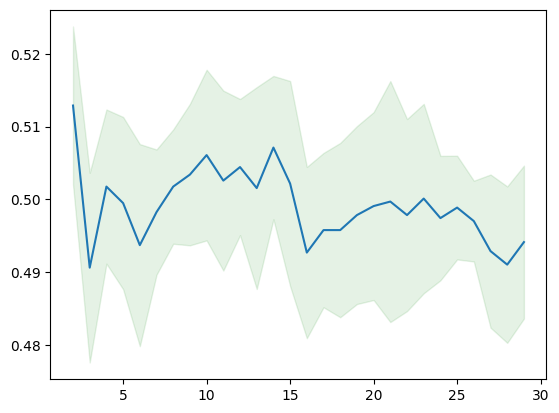

In [191]:
print('KNN results')
model_train(model, param_grid, hyperparams)

графики не строятся, хотя на паре все было в порядке..

upd: уже строятся,
на стэке предложили на похожую проблему вот это "Remove scoring='roc_auc' and it will work as roc_auc curve does not support categorical data."

но ошибки все равно выскакивают

In [153]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())#модель
])
hyperparams = list(range(2, 30))
param_grid = {'knn__n_neighbors': hyperparams}

Normalised KNN results


c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'knn__n_neighbors': 8}
              precision    recall  f1-score   support

           3       1.00      0.08      0.15        24
           4       0.57      0.18      0.27       156
           5       0.66      0.76      0.71      1588
           6       0.66      0.72      0.69      2134
           7       0.66      0.50      0.57       800
           8       0.74      0.18      0.29       141
           9       0.00      0.00      0.00         4

    accuracy                           0.66      4847
   macro avg       0.61      0.35      0.38      4847
weighted avg       0.66      0.66      0.64      4847
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.14      0.02      0.03        58
           5       0.60      0.65      0.62       540
           6       0.55      0.63      0.59       686
           7       0.50      0.42      0.46       274
           8       0.17      0.02      0.

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

ValueError: multi_class must be in ('ovo', 'ovr')

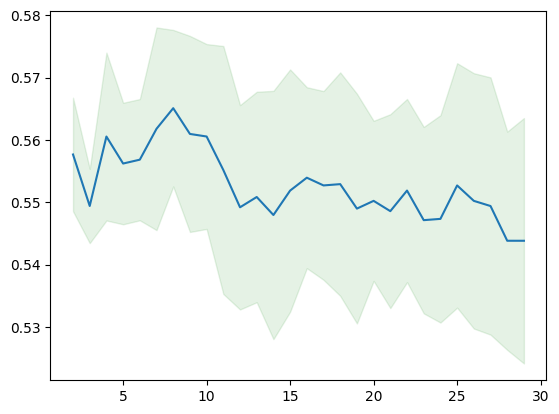

In [154]:
print('Normalised KNN results')
model_train(model, param_grid, hyperparams)

странно, стало хуже..

SGD

In [156]:
model = SGDClassifier()
hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': hyperparams}

SGD results


c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'loss': 'perceptron'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       0.69      0.06      0.11       156
           5       0.64      0.22      0.33      1588
           6       0.46      0.93      0.62      2134
           7       0.00      0.00      0.00       800
           8       0.00      0.00      0.00       141
           9       0.00      0.00      0.00         4

    accuracy                           0.48      4847
   macro avg       0.26      0.17      0.15      4847
weighted avg       0.44      0.48      0.38      4847
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.05      0.09        58
           5       0.62      0.20      0.30       540
           6       0.45      0.94      0.61       686
           7       0.00      0.00      0.00       274
           8       0.00      0.00      0.0

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

ValueError: multi_class must be in ('ovo', 'ovr')

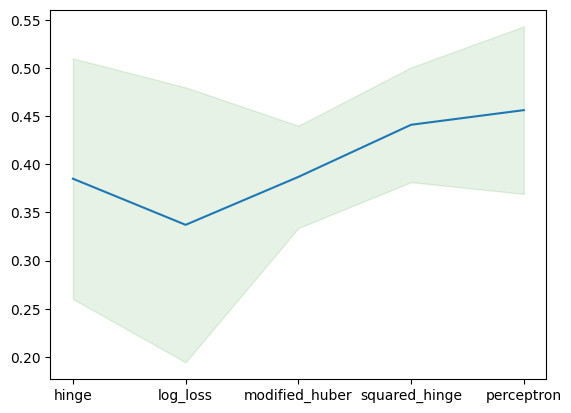

In [157]:
print('SGD results')
model_train(model, param_grid, hyperparams)

In [158]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('sgd', SGDClassifier())
])
hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'sgd__loss': hyperparams}

Normalised SGD results


c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best params: {'sgd__loss': 'log_loss'}
              precision    recall  f1-score   support

           3       1.00      0.08      0.15        24
           4       0.30      0.02      0.04       156
           5       0.59      0.47      0.52      1588
           6       0.49      0.78      0.60      2134
           7       0.41      0.10      0.16       800
           8       0.00      0.00      0.00       141
           9       0.00      0.00      0.00         4

    accuracy                           0.52      4847
   macro avg       0.40      0.21      0.21      4847
weighted avg       0.49      0.52      0.47      4847
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.07      0.12        58
           5       0.62      0.47      0.54       540
           6       0.49      0.78      0.60       686
           7       0.43      0.14      0.21       274
           8       0.00      0.00      

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

ValueError: multi_class must be in ('ovo', 'ovr')

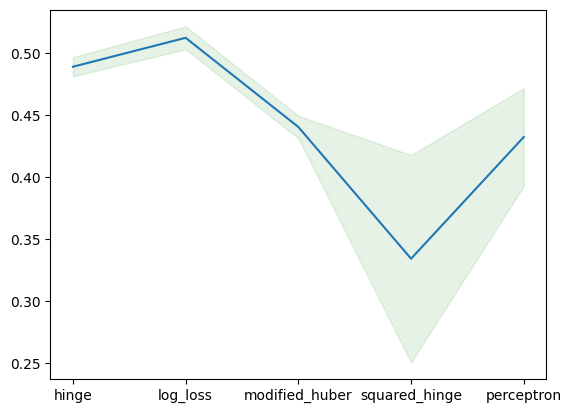

In [159]:
print('Normalised SGD results')
model_train(model, param_grid, hyperparams)

ну это мне совсем не нравится, kNN кажется, получше

А ЕСЛИ ИХ СМЕШАТЬ

In [160]:
model1 = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=4))
])
model2 = Pipeline([
    ('scale', StandardScaler()),
    ('sgd', SGDClassifier(loss='log_loss'))
])
model1.fit(Xtrain, ytrain)
model2.fit(Xtrain, ytrain)
clf1 = model1.predict_proba(Xtest)
clf2 = model2.predict_proba(Xtest)

тут вылезала ошибка "ValueError: multi_class must be in ('ovo', 'ovr')" - попробовала сделать roc_auc_score(pred, ytest, multi_class='ovo(и ovr тоже)') - не помогло, убрала скоры и все заработало, особо не поняла почему она вылезает..но без scores смысла тут особо нет

In [168]:
for alpha in np.arange(0.1, 1.1, 0.1):
    res = alpha * clf1 + (1 - alpha) * clf2

    pred = []
    for elem in res:
        pred.append(np.argmax(elem))
    
    
    print('alpha:', round(alpha, 1))

alpha: 0.1
alpha: 0.2
alpha: 0.3
alpha: 0.4
alpha: 0.5
alpha: 0.6
alpha: 0.7
alpha: 0.8
alpha: 0.9
alpha: 1.0


In [173]:
model = SVC()
hyperparams = list(range(1, 20))
param_grid = {'C': hyperparams}

results


c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'C': 18}
              precision    recall  f1-score   support

           3       0.80      0.17      0.28        24
           4       0.00      0.00      0.00       156
           5       0.56      0.65      0.60      1588
           6       0.51      0.72      0.60      2134
           7       0.00      0.00      0.00       800
           8       0.50      0.03      0.05       141
           9       0.00      0.00      0.00         4

    accuracy                           0.53      4847
   macro avg       0.34      0.22      0.22      4847
weighted avg       0.43      0.53      0.46      4847
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        58
           5       0.57      0.61      0.59       540
           6       0.48      0.73      0.58       686
           7       0.00      0.00      0.00       274
           8       0.00      0.00      0.00        51
 

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

ValueError: multi_class must be in ('ovo', 'ovr')

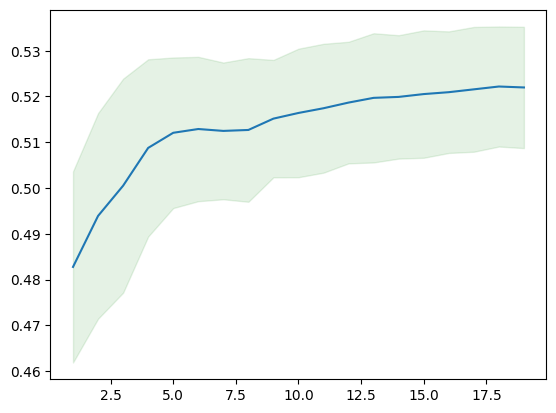

In [174]:
print('results')
model_train(model, param_grid, hyperparams)

ну это совсем... результаты все примерно одинаково не очень хорошие(кроме KNN - там еще куда ни шло), возможно, вино +- зависит от вкусов людей...